![snap](https://lever-client-logos.s3.amazonaws.com/2bd4cdf9-37f2-497f-9096-c2793296a75f-1568844229943.png)

# GetAround

[GetAround](https://www.getaround.com/?wpsrc=Google+Organic+Search) is the Airbnb for cars. You can rent cars from any person for a few hours to a few days! Founded in 2009, this company has known rapid growth. In 2019, they count over 5 million users and about 20K available cars worldwide.

As Jedha's partner, they offered this great challenges:

## Context

When renting a car, our users have to complete a checkin flow at the beginning of the rental and a checkout flow at the end of the rental in order to:

* Assess the state of the car and notify other parties of pre-existing damages or damages that occurred during the rental.
* Compare fuel levels.
* Measure how many kilometers were driven.

The checkin and checkout of our rentals can be done with three distinct flows:
* **📱 Mobile** rental agreement on native apps: driver and owner meet and both sign the rental agreement on the owner’s smartphone
* **Connect:** the driver doesn’t meet the owner and opens the car with his smartphone
* **📝 Paper** contract (negligible)

## Project 🚧

For this case study, we suggest that you put yourselves in our shoes, and run an analysis we made back in 2017 🔮 🪄

When using Getaround, drivers book cars for a specific time period, from an hour to a few days long. They are supposed to bring back the car on time, but it happens from time to time that drivers are late for the checkout.

Late returns at checkout can generate high friction for the next driver if the car was supposed to be rented again on the same day : Customer service often reports users unsatisfied because they had to wait for the car to come back from the previous rental or users that even had to cancel their rental because the car wasn’t returned on time.


## Goals 🎯

In order to mitigate those issues we’ve decided to implement a minimum delay between two rentals. A car won’t be displayed in the search results if the requested checkin or checkout times are too close from an already booked rental.

It solves the late checkout issue but also potentially hurts Getaround/owners revenues: we need to find the right trade off.

**Our Product Manager still needs to decide:**
* **threshold:** how long should the minimum delay be?
* **scope:** should we enable the feature for all cars?, only Connect cars?

In order to help them make the right decision, they are asking you for some data insights. Here are the first analyses they could think of, to kickstart the discussion. Don’t hesitate to perform additional analysis that you find relevant.

* Which share of our owner’s revenue would potentially be affected by the feature?
* How many rentals would be affected by the feature depending on the threshold and scope we choose?
* How often are drivers late for the next check-in? How does it impact the next driver?
* How many problematic cases will it solve depending on the chosen threshold and scope?

### Web dashboard

First build a dashboard that will help the product Management team with the above questions. You can use `streamlit` or any other technology that you see fit.


### Machine Learning - `/predict` endpoint

In addition to the above question, the Data Science team is working on *pricing optimization*. They have gathered some data to suggest optimum prices for car owners using Machine Learning.

You should provide at least **one endpoint** `/predict`. The full URL would look like something like this: `https://your-url.com/predict`.

This endpoint accepts **POST method** with JSON input data and it should return the predictions. We assume **inputs will be always well formatted**. It means you do not have to manage errors. We leave the error handling as a bonus.

Input example:

```
{
  "input": [[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8], [7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8]]
}
```

The response should be a JSON with one key `prediction` corresponding to the prediction.

Response example:

```
{
  "prediction":[6,6]
}
```

### Documentation page

You need to provide the users with a **documentation** about your API.

It has to be located at the `/docs` of your website. If we take the URL example above, it should be located directly at `https://your-url.com/docs`).

This small documentation should at least include:
- An h1 title: the title is up to you.
- A description of every endpoints the user can call with the endpoint name, the HTTP method, the required input and the expected output (you can give example).

You are free to add other any other relevant informations and style your HTML as you wish.

### Online production

You have to **host your API online**. We recommend you to use [Heroku](https://www.heroku.com/) as it is free of charge. But you are free to choose any other hosting provider.

## Helpers 🦮

To help you start with this project we provide you with some pieces of advice:

* Spend some time understanding data
* Don't overlook Data Analysis part, there is a lot of insights to find out.
* Data Analysis should take 2 to 5 hours
* Machine Learning should take 3 to 6 hours
* You are not obligated to use libraries to handle your Machine Learning workflow like `mlflow` but we definitely advise you to do so.


### Share your code

In order to get evaluation, do not forget to share your code on a [Github](https://github.com/) repository. You can create a [`README.md`](https://guides.github.com/features/mastering-markdown/) file with a quick description about this project, how to setup locally and the online URL.

## Deliverable 📬

To complete this project, you should deliver:

- A **dashboard** in production (accessible via a web page for example)
- The **whole code** stored in a **Github repository**. You will include the repository's URL.
- An **documented online API** on Heroku server (or any other provider you choose) containing at least **one `/predict` endpoint** that respects the technical description above. We should be able to request the API endpoint `/predict` using `curl`:

```shell
$ curl -i -H "Content-Type: application/json" -X POST -d '{"input": [[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8]]}' http://your-url/predict
```

Or Python:

```python
import requests

response = requests.post("https://your-url/predict", json={
    "input": [[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8]]
})
print(response.json())
```

## Data

There are two files you need to download:

* [Delay Analysis](https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_delay_analysis.xlsx) 👈 Data Analysis
* [Pricing Optimization](https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv) 👈 Machine Learning


Happy coding! 👩‍💻

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# import plotly.io as pio
# pio.renderers.default = "png" # Comment / delete this line for interactive graphs

In [ ]:
df_delay = pd.read_excel("https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_delay_analysis.xlsx")

In [ ]:
df_price = pd.read_csv("https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv", index_col = 0)

# 1. Delay analysis

## 1.1. Data cleaning

In [ ]:
print(f"Number of rows : {df_delay.shape[0]}")
print(f"Number of columns : {df_delay.shape[1]}")
print()

print("Display of data: ")
display(df_delay.head(10))
print()

print("Basics statistics: ")
display(df_delay.describe(include='all'))
print()

print("Check for duplicates :")
display(df_delay.duplicated(subset=None, keep='first').value_counts())
print()

print("Percentage of missing values: ")
display((100 * df_delay.isnull().sum() /df_delay.shape[0]).sort_values())

Number of rows : 21310
Number of columns : 7

Display of data: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
7,512303,371242,mobile,ended,-44.0,NaN,NaN
8,512475,322502,mobile,canceled,NaN,NaN,NaN
9,513434,256528,connect,ended,23.0,NaN,NaN



Basics statistics: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000



Check for duplicates :


False    21310
dtype: int64


Percentage of missing values: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

There is the same percentage of missing values in time_delta_with_previous_rental_in_minutes as in previous_ended_rental_id, let's check that all these NaN entries are the same.



In [ ]:
# Subset no previous rental id
nan_subset = df_delay[df_delay["previous_ended_rental_id"].isna()]
nan_subset[["previous_ended_rental_id", "time_delta_with_previous_rental_in_minutes"]].value_counts(dropna=False)

previous_ended_rental_id  time_delta_with_previous_rental_in_minutes
NaN                       NaN                                           19469
dtype: int64

The max value of time_delta_with_previous_rental_in_minutes is 720 minutes or 12 hours. All the entries that don't have a time_delta_with_previous_rental_in_minutes are also missing previous_ended_rental_id, so we can assume that the data does not record a previous rental beyond 12 hours.


There are obvious outliers in delay_at_checkout_in_minutes that we'll need to remove.

In [ ]:
# Interquartile method scrapped for deleting approx 3k rows

q1 = df_delay.describe().loc["25%", "delay_at_checkout_in_minutes"]
q3 = df_delay.describe().loc["75%", "delay_at_checkout_in_minutes"]
iqr = q3 - q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(f"IQR conserves values in {lower_bound, upper_bound} interval for delay_at_checkout_in_minutes")
# outliers_mask = ((df_delay["delay_at_checkout_in_minutes"] >= lower_bound) &
#                  (df_delay["delay_at_checkout_in_minutes"] <= upper_bound)) | (df_delay["delay_at_checkout_in_minutes"].isna())
# df_delay = df_delay[outliers_mask]

IQR conserves values in (-190.5, 221.5) interval for delay_at_checkout_in_minutes


In [ ]:
counts = pd.DataFrame(df_delay["delay_at_checkout_in_minutes"].value_counts().sort_index())
counts.head(10)

,delay_at_checkout_in_minutes
-22433.0,1
-17468.0,1
-9849.0,1
-8650.0,1
-5475.0,1
-4624.0,1
-4276.0,1
-3035.0,1
-3030.0,2
-2938.0,1


In [ ]:
counts.tail(20)

,delay_at_checkout_in_minutes
6562.0,1
6568.0,1
6606.0,1
6991.0,1
7139.0,1
7246.0,1
8487.0,1
8703.0,1
9787.0,1
9852.0,1


In [ ]:
outliers_mask = ((df_delay["delay_at_checkout_in_minutes"] >= -3000) &
                  (df_delay["delay_at_checkout_in_minutes"] <= 7200)) | (df_delay["delay_at_checkout_in_minutes"].isna())
df_delay = df_delay[outliers_mask]
df_delay.shape

(21285, 7)

We have managed to remove extreme outliers losing only 25 rows.

## 1.2. EDA

How is our data distributed?

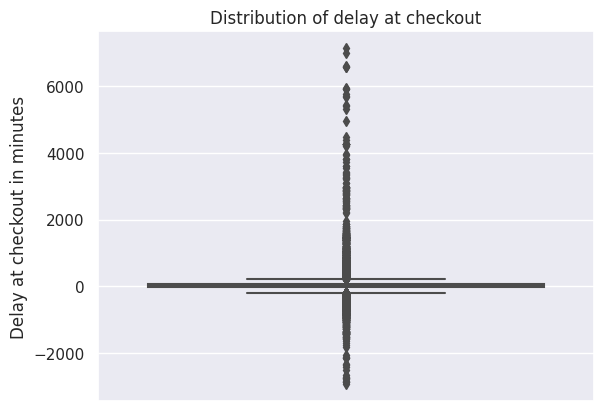

In [ ]:
sns.set(style="darkgrid")

sns.boxplot(y = df_delay["delay_at_checkout_in_minutes"]).set(ylabel = "Delay at checkout in minutes", title = "Distribution of delay at checkout")

plt.show()

The distribution of delay at checkout is extremely scattered. It would be worth to create intervals and analyze delay as a categorical variable rather than a continuous numeric one.

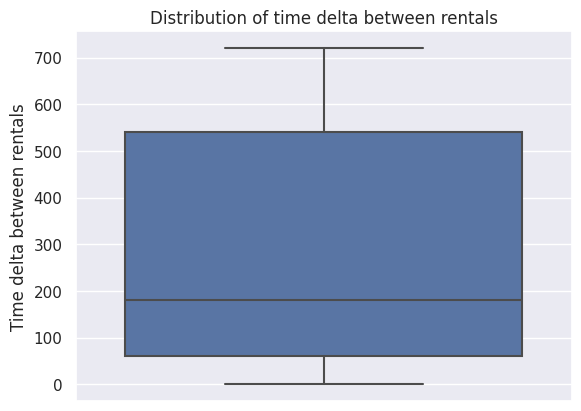

In [ ]:
sns.boxplot(y = df_delay["time_delta_with_previous_rental_in_minutes"]).set(ylabel = "Time delta between rentals", title = "Distribution of time delta between rentals")

plt.show()

The median time delta between rentals is 3 hours, and only 25% of rentals take place within an hour of the previous.

In [ ]:
checkin_type_counts = df_delay['checkin_type'].value_counts()
checkin_type_percentage = (checkin_type_counts / checkin_type_counts.sum()) * 100

fig = px.pie(
    df_delay['checkin_type'].value_counts().reset_index(),
    names='index',
    values='checkin_type',
    color_discrete_sequence = ["#4B9AC7", "#9DD4F3"],
    title='Distribution of checkin types'
)

fig.show()

In order to simplify our delay analysis, we'll create categories to regroup our data inside intervals.

In [ ]:
categories = [
    (df_delay['delay_at_checkout_in_minutes'] <= 0),
    (df_delay['delay_at_checkout_in_minutes'] < 30),
    (df_delay['delay_at_checkout_in_minutes'] < 60),
    (df_delay['delay_at_checkout_in_minutes'] < 120),
    (df_delay['delay_at_checkout_in_minutes'] < 300),
    (df_delay['delay_at_checkout_in_minutes'] < 1440),
    (df_delay['delay_at_checkout_in_minutes'] >= 1440),
    (df_delay['delay_at_checkout_in_minutes'].isna())
]

labels = ['Early or on time', '< 30 minutes', '< 1 hour', '1 to 2 hours', '2 to 5 hours', '5 to 24 hours', '1 day or more', 'Unknown']

df_delay['delay_interval'] = np.select(categories, labels) # np.select function selects the first condition that is true so no overlap
delay_intervals = df_delay.pop('delay_interval')
df_delay.insert(5, delay_intervals.name, delay_intervals)

delay_counts = df_delay['delay_interval'].value_counts()

delay_percentages = (delay_counts / delay_counts.sum()) * 100

late_count = sum(delay_counts[i] for i in range(2, len(delay_counts)))
late_perc = sum(delay_percentages[i] for i in range(2, len(delay_percentages)))

print(
    f"Percentage of early or timely checkouts : {delay_percentages[0]:.2f} \n"
    f"Percentage of late checkouts : {late_perc:.2f} \n"
    f"Percentage unknown : {delay_percentages[1]:.2f}")

Percentage of early or timely checkouts : 32.57 
Percentage of late checkouts : 44.11 
Percentage unknown : 23.32


In [ ]:
fig = go.Figure(data=[
    go.Bar(
        x=delay_counts.index,
        y=delay_counts,
        text=delay_percentages.round(2).astype(str) + '%',
        textposition='outside',
        marker=dict(color="#4BE8E0"),
    )
])

fig.update_layout(
    title='Distribution of delay by category',
    xaxis=dict(title='Delay', categoryorder='array', categoryarray=labels),
    yaxis=dict(title='Count'),
    showlegend=False,
)

fig.show()

In [ ]:
fig = px.box(
    data_frame=df_delay[df_delay['delay_interval'] != "Early or on time"],
    x='delay_interval',
    y='delay_at_checkout_in_minutes',
    labels = {'delay_interval': 'Delay interval', 'delay_at_checkout_in_minutes': 'Minutes'},
    category_orders={"delay_interval": labels[1:-1]})

fig.update_traces(marker_color = "#015955")

fig.update_layout(title='Distribution of delay durations by delay category')
fig.show()

Is there a difference in delays based on checkin type?

In [ ]:
avg_delay_by_checkin = df_delay.groupby('checkin_type')['delay_at_checkout_in_minutes'].mean().reset_index()

fig = px.bar(avg_delay_by_checkin,
             x='checkin_type',
             y='delay_at_checkout_in_minutes',
             color = 'checkin_type',
             color_discrete_sequence = ["#4B9AC7", "#4BE8E0"],
             labels = {'checkin_type' : 'Checkin type', 'delay_at_checkout_in_minutes' : 'Average delay'},
             title='Average delay at checkout by checkin type')

fig.show()

In [ ]:
fig = px.histogram(
    df_delay[~df_delay['delay_interval'].isin(["Early or on time", "Unknown"])],
    x='checkin_type',
    color='delay_interval',
    color_discrete_sequence = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"],
    labels = {"delay_interval" : "Delay interval", "checkin_type" : "Checkin type", "count" : "Count"},
    title='Distribution of delay depending on checkin type')

fig.show()

On average, mobile users are late whereas connect users are early!

While most categories' proportions are relatively similar between checkin type, it appears that only mobile checkins are concerned with delays of more than one day, and there is a much larger proportion of delays between 5 and 24 hours on mobile as well.

One hypothesis to explain this could reside in the checkin functionalities : it is possible that when user and owner have to meet in person to exchange informations and keys, they forget to fill out all formalities on the app, and only remember to do so after a long time has passed (which would explain some absurdly high values of several days!), even though the car was indeed returned. Whereas with the connect option, the user must fill out all forms in order to unlock the car upon checkin and lock it back upon checkout, thus ensuring that they go through the whole process as intended when they actually return the vehicle.

## 1.3. Analysis of delay impact

In order to know which rentals in our dataset were affected by a previous driver's late checkout, we need to identify the rental IDs for which delay at checkout was superior to time delta between rentals.

In [ ]:
df_checkout = df_delay.loc[:, ["rental_id", "delay_at_checkout_in_minutes"]]
df_checkout = df_checkout.rename(columns = {"rental_id" : "previous_ended_rental_id", "delay_at_checkout_in_minutes" : "previous_rental_delay"})
df_checkout.head()

,previous_ended_rental_id,previous_rental_delay
0,505000,NaN
1,507750,-81.0
2,508131,70.0
3,508865,NaN
4,511440,NaN


In [ ]:
df_delay2 = df_delay.merge(df_checkout, on = "previous_ended_rental_id")
df_delay2["time_delta_with_previous_return"] = df_delay2["time_delta_with_previous_rental_in_minutes"] - df_delay2["previous_rental_delay"]
df_impacted = df_delay2[df_delay2["time_delta_with_previous_return"] < 0]

print(f"Total number of impacted rentals : {df_impacted.shape[0]} (or {df_impacted.shape[0]*100/df_delay.shape[0]:.3}% of total rentals)\n"
      f"Average duration of impactful delay : {df_impacted.previous_rental_delay.mean():.2f}\n"
      f"Average waiting time for impacted users : {abs(df_impacted.time_delta_with_previous_return.mean()):.2f}\n"
      f"Proportion of impactful delays : {df_impacted.shape[0]*100/late_count:.3}%\n")

df_impacted.head(10)

Total number of impacted rentals : 217 (or 1.02% of total rentals)
Average duration of impactful delay : 180.29
Average waiting time for impacted users : 120.56
Proportion of impactful delays : 2.31%



,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,delay_interval,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,previous_rental_delay,time_delta_with_previous_return
11,540479,374684,mobile,ended,12.0,< 30 minutes,539751.0,0.0,3.0,-3.0
12,541862,382364,mobile,ended,125.0,2 to 5 hours,540607.0,0.0,1.0,-1.0
40,559781,408776,mobile,ended,44.0,< 1 hour,540868.0,0.0,26.0,-26.0
68,574568,301512,mobile,ended,110.0,1 to 2 hours,572909.0,0.0,13.0,-13.0
72,535519,353425,connect,ended,-166.0,Early or on time,533413.0,0.0,4.0,-4.0
73,537441,408821,mobile,ended,25.0,< 30 minutes,541519.0,90.0,95.0,-5.0
93,544473,378931,mobile,ended,-4.0,Early or on time,536978.0,60.0,271.0,-211.0
98,543108,376574,mobile,ended,23.0,< 30 minutes,514474.0,0.0,81.0,-81.0
127,539151,282893,mobile,canceled,NaN,Unknown,548646.0,30.0,201.0,-171.0
133,547655,375834,mobile,ended,89.0,1 to 2 hours,548169.0,0.0,5.0,-5.0


In [ ]:
df_delay = pd.merge(df_delay, df_impacted, on=df_delay.columns.to_list() , how='left')
df_delay['impacted'] = df_delay['rental_id'].isin(df_impacted['rental_id']).astype(int)
df_delay = df_delay.rename(columns = {'time_delta_with_previous_return' : 'waiting_time'})
df_delay['waiting_time'] = df_delay['waiting_time'].fillna(0)
print(len(df_delay))
print(len(df_delay[df_delay["impacted"] == 1]))
df_delay[df_delay["impacted"] == 1].head(10)

21285
217


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,delay_interval,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,previous_rental_delay,waiting_time,impacted
148,540479,374684,mobile,ended,12.0,< 30 minutes,539751.0,0.0,3.0,-3.0,1
163,541862,382364,mobile,ended,125.0,2 to 5 hours,540607.0,0.0,1.0,-1.0,1
437,559781,408776,mobile,ended,44.0,< 1 hour,540868.0,0.0,26.0,-26.0,1
734,574568,301512,mobile,ended,110.0,1 to 2 hours,572909.0,0.0,13.0,-13.0,1
843,535519,353425,connect,ended,-166.0,Early or on time,533413.0,0.0,4.0,-4.0,1
863,537441,408821,mobile,ended,25.0,< 30 minutes,541519.0,90.0,95.0,-5.0,1
1184,544473,378931,mobile,ended,-4.0,Early or on time,536978.0,60.0,271.0,-211.0,1
1269,543108,376574,mobile,ended,23.0,< 30 minutes,514474.0,0.0,81.0,-81.0,1
1621,539151,282893,mobile,canceled,NaN,Unknown,548646.0,30.0,201.0,-171.0,1
1756,547655,375834,mobile,ended,89.0,1 to 2 hours,548169.0,0.0,5.0,-5.0,1


In [ ]:
fig = px.histogram(
    df_impacted,
    x='previous_rental_delay',
    nbins = 100,
    range_x = [0, 1000],
    histnorm = 'percent',
    labels = {'previous_rental_delay': 'Previous rental delay', 'count': 'Count'},
    title='Distribution of impactful delays')

fig.update_traces(marker_color = "#0E3449")

fig.show()

In [ ]:
impacted_cat = [
    (df_impacted['previous_rental_delay'] < 30),
    (df_impacted['previous_rental_delay'] < 60),
    (df_impacted['previous_rental_delay'] < 120),
    (df_impacted['previous_rental_delay'] < 300),
    (df_impacted['previous_rental_delay'] < 1440),
    (df_impacted['previous_rental_delay'] >= 1440),
]

impacted_labels = ['< 30 minutes', '< 1 hour', '1 to 2 hours', '2 to 5 hours', '5 to 24 hours', '1 day or more']

df_impacted['previous_delay_interval'] = np.select(impacted_cat, impacted_labels)

impacted_perc_values = (df_impacted['previous_delay_interval'].value_counts(normalize=True)[impacted_labels] * 100).round(2)
impacted_perc_text = [f'{p:.2f}%' for p in impacted_perc_values]

<ipython-input-46-ebc3416c3067>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.histogram(
    df_impacted,
    x='previous_delay_interval',
    histnorm = 'percent',
    labels = {'previous_delay_interval': 'Previous rental delay interval'},
    title='Distribution of impactful delays intervals')


fig.update_xaxes(categoryorder='array', categoryarray=impacted_labels)
fig.update_layout(yaxis_title='Percentage')
fig.update_traces(marker_color = "#0E3449", hovertemplate='%{y:.2f}%', text=impacted_perc_text, textposition='outside')
fig.show()

Do users who experience delay cancel more often?

In [ ]:
gen_cxl_rate = df_delay["state"].value_counts(normalize=True)[1]*100
no_delay_cxl_rate = df_delay[df_delay["impacted"] == 0]["state"].value_counts(normalize=True)[1]*100
delay_cxl_rate = df_delay[df_delay["impacted"] == 1]["state"].value_counts(normalize=True)[1]*100

cxl_labels = ['All Users', 'Users without Delay', 'Users with Delay']
cxl_rates = [gen_cxl_rate.round(2), no_delay_cxl_rate.round(2), delay_cxl_rate.round(2)]
cxl_perc_text = [f'{p:.2f}%' for p in cxl_rates]

fig = px.bar(
    x=cxl_labels,
    y=cxl_rates,
    color = cxl_labels,
    color_discrete_sequence=["#4B9AC7", "#9DD4F3", "#0E3449"],
    labels={'x': 'User category', 'y': 'Cancellation rate in %'},
    title='Impact of delays on cancellation rate',
    text=[f'{p:.2f}%' for p in cxl_rates]
)
fig.update_traces(hovertemplate='%{y:.2f}%', textposition='outside')
fig.update_layout(showlegend=False)
fig.show()

And does checkin type make a difference?

In [ ]:
mobile_cxl_rate = df_delay[df_delay["checkin_type"] == "mobile"]["state"].value_counts(normalize=True)[1] * 100
connect_cxl_rate = df_delay[df_delay["checkin_type"] == "connect"]["state"].value_counts(normalize=True)[1] * 100

cxl_labels = ['All users', 'Users without delay', 'Users with delay']
mobile_cxl_rates = [gen_cxl_rate.round(2), no_delay_cxl_rate.round(2), mobile_cxl_rate.round(2)]
connect_cxl_rates = [gen_cxl_rate.round(2), no_delay_cxl_rate.round(2), connect_cxl_rate.round(2)]


df_grouped = pd.DataFrame({
    'User category': cxl_labels * 2,
    'Cancellation rate': mobile_cxl_rates + connect_cxl_rates,
    'Checkin type': ['mobile'] * 3 + ['connect'] * 3,
})

fig_grouped = px.bar(
    df_grouped,
    x='User category',
    y='Cancellation rate',
    color='Checkin type',
    barmode='group',  # Set barmode to 'group' for side-by-side bars
    color_discrete_sequence=["#4B9AC7", "#9DD4F3"],
    labels={'User category': 'User category', 'Cancellation rate': 'Cancellation rate in %'},
    title='Cancellation rates for "mobile" and "connect" checkin types',
    text=[f'{p:.2f}%' for p in df_grouped['Cancellation rate']]
)
fig_grouped.update_traces(hovertemplate='%{y:.2f}%', textposition='outside')

fig_grouped.show()

Cancellation rate is significantly higher in users who experience delay, but more importantly this only concerns users of Connect checkin type!
Which suggests that delay is a major contrinbuting factor to cancellations in connect bookings, but not for mobile users. Actually, the cancellation rate on mobile for delayed users is lower than for the general category.

This further suggests that delays on mobile might be, in some cases, a glitch, inflating the delay count and duration.

Only 2.31% of late checkouts are actually impacting the next user negatively, and among those, more tha half is under 100 minutes and almost all are under 300 minutes.

However, experiencing delay appears to be a major contributing factor in cancellation, and therefore loss of revenue for car owners.

Now what if Getaround instated a mandatory time delay between rentals? What would be an ideal threshold value that would affect a minimum amount of rentals while solving the most delay issues?

In [ ]:
df_impacted['time_delta_with_previous_rental_in_minutes'].value_counts()

0.0      116
30.0      30
60.0      26
120.0     12
90.0       8
240.0      5
150.0      4
180.0      4
210.0      2
510.0      2
450.0      2
720.0      2
570.0      1
630.0      1
300.0      1
540.0      1
Name: time_delta_with_previous_rental_in_minutes, dtype: int64

In [ ]:
def analyze_data(df):
    threshold_values = range(0, 301, 15)

    total_rentals = len(df)
    total_delayed = len(df[df["delay_at_checkout_in_minutes"] > 0])
    total_impacted = len(df[df["impacted"] == 1])
    total_cancelled = len(df[df["state"] == "canceled"])

    lost_counts = []
    lost_rates = []
    delayed_counts = []
    delayed_rates = []
    impacted_counts = []
    impacted_rates = []
    impacting_delays_rates = []
    solved_counts = []
    solved_rates = []
    cancelled_counts = []
    cancelled_rates = []

    for threshold in threshold_values:

        lost_rentals = df[df['time_delta_with_previous_rental_in_minutes'] < threshold]
        lost_rentals_count = len(lost_rentals)
        lost_rentals_proportion = lost_rentals_count * 100 / total_rentals

        unaffected = df.drop(lost_rentals.index, axis=0)

        delayed = df[df["delay_at_checkout_in_minutes"] > threshold]
        delayed_count = len(delayed)
        delayed_rate = delayed_count / total_delayed

        impacted = unaffected[unaffected["impacted"] == 1]
        impacted_count = len(impacted)
        impacted_rate = impacted_count / total_impacted
        impacting_delays_rate = impacted_count / total_delayed

        solved = lost_rentals[lost_rentals["impacted"] == 1]
        solved_count = len(solved)
        solved_rate = solved_count / total_impacted

        cancelled_count = unaffected["state"].value_counts()["canceled"]
        cancelled_rate = cancelled_count / total_cancelled

        lost_counts.append(lost_rentals_count)
        lost_rates.append(lost_rentals_proportion)
        delayed_counts.append(delayed_count)
        delayed_rates.append(delayed_rate)
        impacted_counts.append(impacted_count)
        impacted_rates.append(impacted_rate)
        impacting_delays_rates.append(impacting_delays_rate)
        solved_counts.append(solved_count)
        solved_rates.append(solved_rate)
        cancelled_counts.append(cancelled_count)
        cancelled_rates.append(cancelled_rate)

    plot_data = pd.DataFrame({
        'threshold': threshold_values,
        'lost_rentals_count': lost_counts,
        'lost_rentals_proportion': lost_rates,
        'delayed_counts': delayed_counts,
        'delayed_rates': delayed_rates,
        'impacted_counts': impacted_counts,
        'impacted_rates': impacted_rates,
        'impacting_delays_rates': impacting_delays_rates,
        'solved_counts': solved_counts,
        'solved_rates': solved_rates,
        'cancelled_counts': cancelled_counts,
        'cancelled_rates': cancelled_rates
    })

    return plot_data

In [ ]:
plot_data = analyze_data(df_delay)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=plot_data['threshold'], y=plot_data['impacted_rates'], name='Impacted rate', yaxis='y1'))
fig.add_trace(go.Scatter(x=plot_data['threshold'], y=plot_data['lost_rentals_proportion'], name='Rental loss rate', yaxis='y2'))

# Update layout to include two y-axes
fig.update_layout(
    title='Impact of threshold on rental loss and problem rate',
    xaxis_title='Threshold',
    yaxis=dict(title='Delay impacted rate', side='right', showgrid=False),
    yaxis2=dict(title='Rental loss rate', side='left', overlaying='y'),
    legend=dict(x=0.5, y=1.2)
)

fig.show()

More than 50% of problematic delays have no time delta between rentals. Therefore, setting the threshold at 30 minutes solves more than 50% problematic rentals while affecting only 1.30% of total rentals.

Depending on Getaround strategy and goals, it is possible to set a higher threshold : for instance, 45 minutes threshold leaves less than a third of initial problematic rentals while affecting 1.88% sales. This might yield higher users' satisfaction but more owners' losses.

Should we set a different threshold for mobile and connect users?

In [ ]:
df_mobile = df_delay[df_delay["checkin_type"] == 'mobile']
plot_mobile = analyze_data(df_mobile)

fig = go.Figure()

fig.add_trace(go.Scatter(x=plot_mobile['threshold'], y=plot_mobile['impacted_rates'], name='Impacted rate', yaxis='y1'))
fig.add_trace(go.Scatter(x=plot_mobile['threshold'], y=plot_mobile['lost_rentals_proportion'], name='Rental loss rate', yaxis='y2'))

# Update layout to include two y-axes
fig.update_layout(
    title='Impact of threshold on rental loss and problem rate for mobile users',
    xaxis_title='Threshold',
    yaxis=dict(title='Delay impacted rate', side='right', showgrid=False),
    yaxis2=dict(title='Rental loss rate', side='left', overlaying='y'),
    legend=dict(x=0.5, y=1.2)
)

fig.show()

In [ ]:
df_connect = df_delay[df_delay["checkin_type"] == 'connect']
plot_connect = analyze_data(df_connect)

fig = go.Figure()

fig.add_trace(go.Scatter(x=plot_connect['threshold'], y=plot_connect['impacted_rates'], name='Impacted rate', yaxis='y1'))
fig.add_trace(go.Scatter(x=plot_connect['threshold'], y=plot_connect['lost_rentals_proportion'], name='Rental loss rate', yaxis='y2'))

# Update layout to include two y-axes
fig.update_layout(
    title='Impact of threshold on rental loss and problem rate for connect users',
    xaxis_title='Threshold',
    yaxis=dict(title='Delay impacted rate', side='right', showgrid=False),
    yaxis2=dict(title='Rental loss rate', side='left', overlaying='y'),
    legend=dict(x=0.5, y=1.2)
)

fig.show()

Overall the evolution of the impacted rate is the same for bot typees of users : we reach approximately 45% of problem rate for a 30 minutes threshold, which goes down to approx 31% for 45 minutes.

However, it is worth noting that sales loss are much higher at a 45 minutes threshold for connect users (around 4.20%) while the proportion is 1.30% for mobile users.

We can therefore suggest that, if Getaround does decide to be more conservative with their threshold setting and set it higher for maximum delay issues reduction, while it will be fine to set a threshold of 45 min for mobiles users, it might be wise to keep the delay threshold at a max of 30 minutes for connect users to mitigate losses.

In [ ]:
# Saving dataframe for dashboarding
df_delay.to_csv("df_getaround_delay.csv")

# 2. Rental prices

## 2.1. Data cleaning

In [ ]:
print(f"Number of rows : {df_price.shape[0]}")
print(f"Number of columns : {df_price.shape[1]}")
print()

print("Display of data: ")
display(df_price.head(10))
print()

print("Basics statistics: ")
display(df_price.describe(include='all'))
print()

print("Check for duplicates :")
display(df_price.duplicated(subset=None, keep='first').value_counts())
print()

print("Percentage of missing values: ")
display((100 * df_price.isnull().sum() / df_price.shape[0]).sort_values())

Number of rows : 4843
Number of columns : 14

Display of data: 


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183
5,Citroën,152352,225,petrol,black,convertible,True,True,False,False,True,True,True,131
6,Citroën,205219,145,diesel,grey,convertible,True,True,False,False,True,True,True,111
7,Citroën,115560,105,petrol,white,convertible,True,True,False,False,False,True,True,78
8,Peugeot,123886,125,petrol,black,convertible,True,False,False,False,False,True,True,79
9,Citroën,139541,135,diesel,white,convertible,False,False,False,False,True,False,True,132



Basics statistics: 


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000



Check for duplicates :


False    4843
dtype: int64


Percentage of missing values: 


model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

In [ ]:
df_price = df_price[(df_price["mileage"] >= 0) & (df_price["mileage"] <500000)]
df_price.shape

(4841, 14)

## 2.2. EDA

In [ ]:
fig = px.histogram(df_price, x='rental_price_per_day', nbins=30, title='Distribution of rental prices')
fig.show()

Daily rental prices follow a close to normal distribution with most prices centered around 120. From our description table above, we can see that rental prices mean is almost equal to its median, at resepctively 121.20 and 119.

In [ ]:
fig = px.scatter_matrix(df_price, dimensions=['mileage', 'engine_power', 'rental_price_per_day'],
                        color='fuel', title='Pairwise relationships between numeric features')
fig.show()

We can see that the rental price per day tends to
*   decrease as mileage increases, as it suggests an older, more used car.
*   increase with engine_power

*   Petrol cars tend to be cheaper than diesel





In [ ]:
fig = px.box(df_price, x='fuel', y='rental_price_per_day', title='Rental Prices by Fuel Type')
fig.show()

This confirms petrol cars are cheaper overall, with hybrids being more expensive. There are too few data points for electric to draw conclusions.

In [ ]:
fig = px.box(df_price, x='car_type', y='rental_price_per_day', color='automatic_car',
             title='Rental prices by car type and automatic transmission')
fig.show()

Automatic cars tend to be more expensive for all car types. Sedans and SUV have a wide range of prices with more outliers than other categories. These car types' rental prices might be harder to predict because of their scattered distribution.

In [ ]:
fig = px.pie(df_price['paint_color'].value_counts().reset_index(),
             names='index', values='paint_color', title='Distribution of Paint Colors')
fig.show()

More than half cars are black or grey.

In [ ]:
fig = px.imshow(df_price.corr(), color_continuous_scale='brbg',
                title='Correlation Heatmap')
fig.show()

<ipython-input-64-c40bd2061817>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



The correlation heatmap suggests that the features more strongly correlated to rental price are :


*   mileage : negatively correlated
*   engine_power, automatic : positively correlated

Pretty logically, newer cars and/or with better features tend to be more expensive. It is interesting to note equipping the Getaround option is the 4th most correlated feature, suggesting there may be a difference in pricing beteween mobile and connct checkins.

## 2.3. Models training and selection

In [ ]:
# train.py MLFLOW

In [100]:
import requests
import json

df_test = df_price.sample(1)
values = []
for element in df_test.iloc[0,:].values.tolist():
    if type(element) != str:
        values.append(element.item())
    else:
        values.append(element)

df_dict = {key:value for key, value in zip(df_price.columns, values)}

r = requests.post("https://fastapi-heroku-app-cd532d0f29eb.herokuapp.com/predict", json=df_dict)

response = r.json()
print(response)

{'prediction': 111.18028148742083}


In [101]:
# Last but not least : let's create our requirements.txt file for this notebook :
!pip3 freeze > requirements.txt